# Univariate roc-auc or MSE

This procedure works as follows:

First, it builds one decision tree per feature, to predict the target

Second, it makes predictions using the decision tree and the mentioned feature

Third, it measures the performance of that prediction, be it the roc-auc, the mse, or any other metric

Fourth, it ranks the features according to the machine learning metric (roc-auc or mse)
It selects the highest ranking features

# LIBS

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

# FILTER METHOD

In [3]:
#dataset
df = pd.read_csv('data2.csv')
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [5]:
#train and test set
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis = 1),
    df['target'],
    test_size = 0.3,
    random_state = 0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

# ROC-AUC

In [7]:
roc_values = []

for f in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[f].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[f].to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
roc_values

[0.5069248231292061,
 0.5006908738145861,
 0.4931445654646017,
 0.5039101753068067,
 0.5014351366034588,
 0.5028347252717772,
 0.5095234564543892,
 0.5062626193645395,
 0.4913455716601861,
 0.5066196352647712,
 0.5045353555616665,
 0.5002906272350842,
 0.5051977300539805,
 0.5075568568796229,
 0.5013494679089949,
 0.576700724799837,
 0.4964642182289567,
 0.5005232436545717,
 0.4961361650546115,
 0.4952698198030656,
 0.5118118776443731,
 0.5055316855269905,
 0.5020859991744099,
 0.49744758508791553,
 0.5029154550593005,
 0.5011222050207342,
 0.5027630928288901,
 0.5047659598338821,
 0.5018325417871161,
 0.51064807605185,
 0.49892248903837044,
 0.4966823959674129,
 0.5070044919663497,
 0.5571927252949473,
 0.5022525805788765,
 0.4950394838171531,
 0.49889844082976076,
 0.5043975173761113,
 0.5032835194772808,
 0.49955773002959075,
 0.49718355478131926,
 0.49678049119563616,
 0.501371357632349,
 0.510048175683627,
 0.4954644005416944,
 0.5036931560773859,
 0.5066867556198359,
 0.540840394

Text(0, 0.5, 'roc-auc')

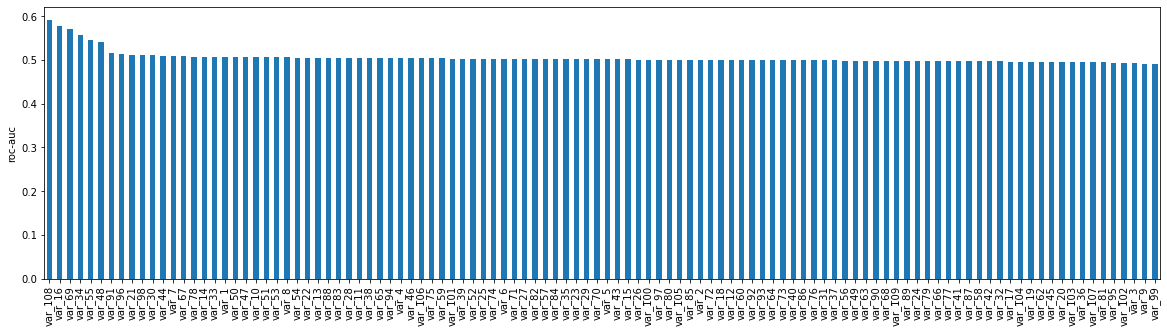

In [10]:
# 1) capture the roc-auc values in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on the roc-auc
# 4) and make a var plot

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [12]:
len(roc_values[roc_values > 0.5]) #67 of 108 features show a predictive performance higher than 0.5.

67

In [14]:
#Select features with roc-auc > 0.5
selected_features = roc_values[roc_values > 0.5].index

selected_features

Index(['var_1', 'var_2', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_18',
       'var_21', 'var_22', 'var_23', 'var_25', 'var_26', 'var_27', 'var_28',
       'var_29', 'var_30', 'var_33', 'var_34', 'var_35', 'var_38', 'var_39',
       'var_43', 'var_44', 'var_46', 'var_47', 'var_48', 'var_50', 'var_51',
       'var_52', 'var_53', 'var_54', 'var_55', 'var_57', 'var_59', 'var_65',
       'var_67', 'var_69', 'var_70', 'var_71', 'var_72', 'var_74', 'var_75',
       'var_78', 'var_80', 'var_82', 'var_83', 'var_84', 'var_85', 'var_88',
       'var_91', 'var_94', 'var_96', 'var_97', 'var_98', 'var_100', 'var_101',
       'var_105', 'var_106', 'var_108'],
      dtype='object')

In [15]:
# select features in the dataframes

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((35000, 67), (15000, 67))